Вариант N=10
Столбец X (фактор): age (Возраст)
Столбец Y (результат): height (Рост)

--- 1. Расчет корреляций ---
Коэффициент Фехнера: 0.1000
Коэффициент Пирсона: 0.1944 (p-value: 0.4115)
95% Доверительный интервал: [-0.2715, 0.5865]
Коэффициент Спирмена: 0.1750
Коэффициент Кендалла: 0.1223


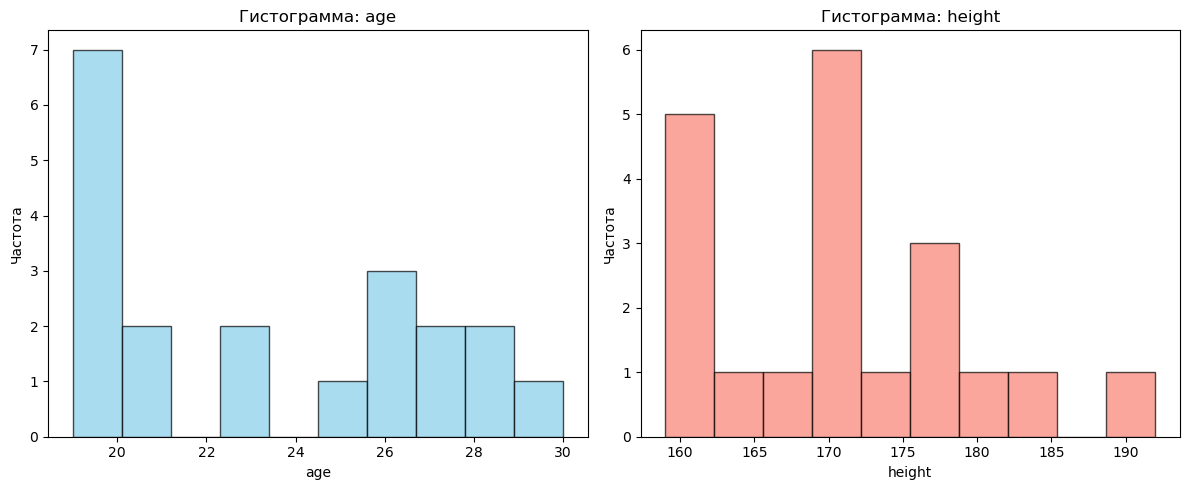

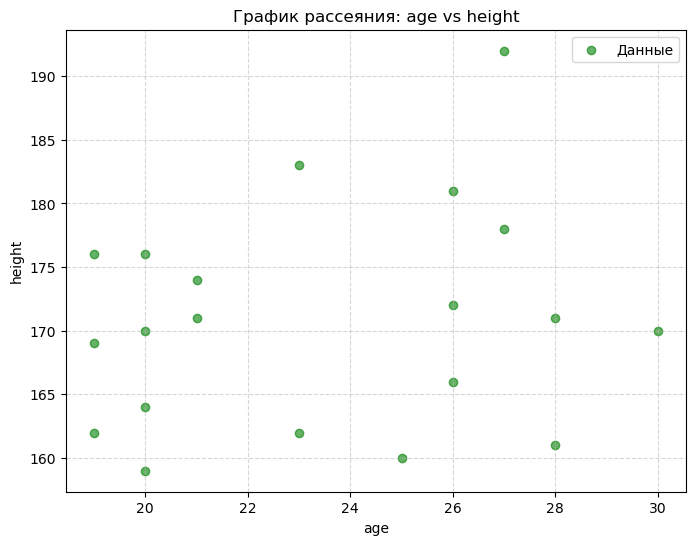


--- 3. Построение регрессий ---
1. Линейная: y = 0.46*x + 160.10 | R^2 = 0.0378
2. Квадратичная: y = -0.1185*x^2 + 6.09*x + 94.60 | R^2 = 0.0549
3. Гиперболическая: y = -263.96/x + 182.39 | R^2 = 0.0422
4. Показательная: y = 160.58 * 1.00^x | R^2 = 0.0370


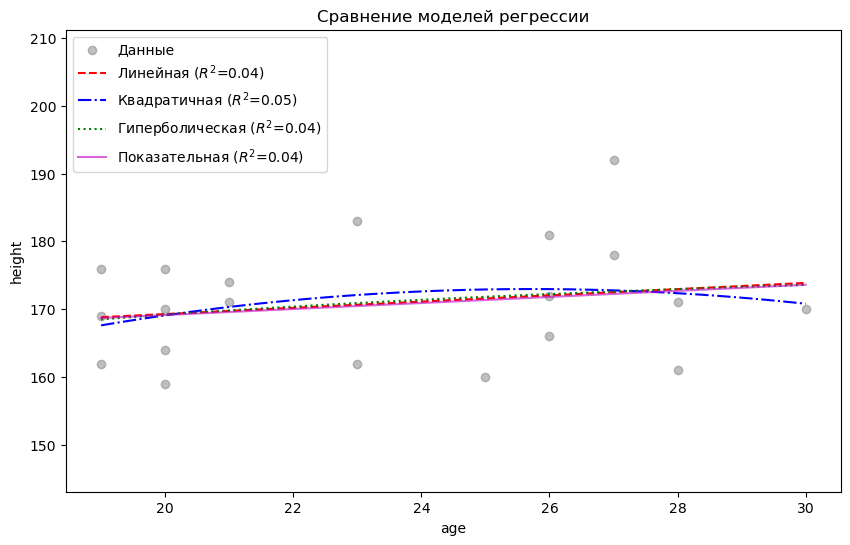


--- 4. Оценка значимости моделей (F-критерий) ---
Наилучшая модель: Quadratic (R^2 = 0.0549)
Наихудшая модель: Exponential (R^2 = 0.0370)

Анализ лучшей модели (Quadratic):
F-статистика: 0.4936, F-критическое: 3.5915
Вывод: Модель НЕ значима.

Анализ худшей модели (Exponential):
F-статистика: 0.6922, F-критическое: 4.4139
Вывод: Модель НЕ значима.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ---------------------------------------------------------
# 1. ПОДГОТОВКА ДАННЫХ
# ---------------------------------------------------------
filename = 'students_simple.csv'

# Если файла нет, создадим его (симуляция данных студентов)
if not os.path.exists(filename):
    print(f"Файл {filename} не найден. Создаю тестовый набор данных...")
    np.random.seed(42)
    n_samples = 200
    data = {
        'height': np.random.normal(170, 10, n_samples),
        'mass': np.random.normal(65, 12, n_samples),
        'income': np.random.exponential(15000, n_samples) + 2000,
        'iq': np.random.normal(100, 15, n_samples),
        'pages': np.random.poisson(200, n_samples),
        'age': np.random.randint(18, 26, n_samples), # Возраст от 18 до 25
        'bmi': np.random.normal(22, 3, n_samples),
        'work_exp': np.random.exponential(2, n_samples),
        'friends': np.random.poisson(5, n_samples),
        'test_time': np.random.normal(60, 20, n_samples)
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
else:
    df = pd.read_csv(filename)

# Выбор столбцов для N = 10
N = 10
columns = ["height", "mass", "income", "iq", "pages", "age", "bmi", "work_exp", "friends", "test_time"]

# Формулы из задания
idx1 = N % 5                 # 10 % 5 = 0 -> height
idx2 = (N**2) % 5 + 5        # 100 % 5 + 5 = 0 + 5 = 5 -> age

col1 = columns[idx1]
col2 = columns[idx2]

print(f"Вариант N={N}")
print(f"Столбец X (фактор): {col2} (Возраст)") # Логичнее, что возраст влияет на рост (или нет), а не наоборот
print(f"Столбец Y (результат): {col1} (Рост)")

# Берем данные
x = df[col2].values # age
y = df[col1].values # height
n = len(x)

# ---------------------------------------------------------
# 2. РАСЧЕТ КОРРЕЛЯЦИЙ (Задание I)
# ---------------------------------------------------------
print("\n--- 1. Расчет корреляций ---")

# 1. Коэффициент Фехнера (Ручная реализация)
x_mean = np.mean(x)
y_mean = np.mean(y)
signs = np.sign((x - x_mean) * (y - y_mean))
# Совпадений знаков минус несовпадений
matches = np.sum(signs > 0)
mismatches = np.sum(signs < 0)
r_fechner = (matches - mismatches) / (matches + mismatches)

print(f"Коэффициент Фехнера: {r_fechner:.4f}")

# 2. Пирсон + Доверительный интервал
r_pearson, p_pearson = stats.pearsonr(x, y)
# Доверительный интервал через преобразование Фишера
stderr = 1.0 / np.sqrt(n - 3)
z = np.arctanh(r_pearson)
delta = 1.96 * stderr # для 95% надежности
lower = np.tanh(z - delta)
upper = np.tanh(z + delta)

print(f"Коэффициент Пирсона: {r_pearson:.4f} (p-value: {p_pearson:.4f})")
print(f"95% Доверительный интервал: [{lower:.4f}, {upper:.4f}]")

# 3. Спирмен
r_spearman, p_spearman = stats.spearmanr(x, y)
print(f"Коэффициент Спирмена: {r_spearman:.4f}")

# 4. Кендалл
r_kendall, p_kendall = stats.kendalltau(x, y)
print(f"Коэффициент Кендалла: {r_kendall:.4f}")


# ---------------------------------------------------------
# 3. ВИЗУАЛИЗАЦИЯ (Задание II)
# ---------------------------------------------------------
plt.figure(figsize=(12, 5))

# Гистограммы
plt.subplot(1, 2, 1)
plt.hist(x, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Гистограмма: {col2}')
plt.xlabel(col2)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(y, bins=10, color='salmon', edgecolor='black', alpha=0.7)
plt.title(f'Гистограмма: {col1}')
plt.xlabel(col1)
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# График рассеяния (Scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='green', alpha=0.6, label='Данные')
plt.title(f'График рассеяния: {col2} vs {col1}')
plt.xlabel(col2)
plt.ylabel(col1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# ---------------------------------------------------------
# 4. УРАВНЕНИЯ РЕГРЕССИИ (Задание III)
# ---------------------------------------------------------
print("\n--- 3. Построение регрессий ---")
from sklearn.metrics import r2_score

# Вспомогательный массив для графиков
x_plot = np.linspace(min(x), max(x), 100)

models_stats = {} # Словарь для хранения R^2

# === 1. Линейная (Manual implementation) ===
# y = w1*x + w0
# w1 = cov(x,y) / var(x)
w1_lin = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
w0_lin = y_mean - w1_lin * x_mean

y_pred_lin = w1_lin * x + w0_lin
r2_lin = r2_score(y, y_pred_lin)
models_stats['Linear'] = {'r2': r2_lin, 'k': 1, 'y_pred': y_pred_lin}

print(f"1. Линейная: y = {w1_lin:.2f}*x + {w0_lin:.2f} | R^2 = {r2_lin:.4f}")

# === 2. Квадратичная (Polyfit) ===
# y = w2*x^2 + w1*x + w0
w2_q, w1_q, w0_q = np.polyfit(x, y, 2)
y_pred_quad = w2_q*(x**2) + w1_q*x + w0_q
r2_quad = r2_score(y, y_pred_quad)
models_stats['Quadratic'] = {'r2': r2_quad, 'k': 2, 'y_pred': y_pred_quad}

print(f"2. Квадратичная: y = {w2_q:.4f}*x^2 + {w1_q:.2f}*x + {w0_q:.2f} | R^2 = {r2_quad:.4f}")

# === 3. Гиперболическая ===
# y = w1/x + w0  -> замена z = 1/x -> y = w1*z + w0
z = 1 / x
# МНК для z и y
z_mean = np.mean(z)
w1_hyp = np.sum((z - z_mean)*(y - y_mean)) / np.sum((z - z_mean)**2)
w0_hyp = y_mean - w1_hyp * z_mean

y_pred_hyp = w1_hyp * (1/x) + w0_hyp
r2_hyp = r2_score(y, y_pred_hyp)
models_stats['Hyperbolic'] = {'r2': r2_hyp, 'k': 1, 'y_pred': y_pred_hyp}

print(f"3. Гиперболическая: y = {w1_hyp:.2f}/x + {w0_hyp:.2f} | R^2 = {r2_hyp:.4f}")

# === 4. Показательная ===
# y = w0 * w1^x  -> ln(y) = ln(w0) + x * ln(w1)
# Линейная регрессия между x и ln(y)
y_log = np.log(y)
y_log_mean = np.mean(y_log)

# Коэффициент при x (это ln(w1))
b_exp = np.sum((x - x_mean)*(y_log - y_log_mean)) / np.sum((x - x_mean)**2)
# Свободный член (это ln(w0))
a_exp = y_log_mean - b_exp * x_mean

w1_exp = np.exp(b_exp)
w0_exp = np.exp(a_exp)

y_pred_exp = w0_exp * (w1_exp ** x)
r2_exp = r2_score(y, y_pred_exp)
models_stats['Exponential'] = {'r2': r2_exp, 'k': 1, 'y_pred': y_pred_exp}

print(f"4. Показательная: y = {w0_exp:.2f} * {w1_exp:.2f}^x | R^2 = {r2_exp:.4f}")


# ОТОБРАЖЕНИЕ ВСЕХ МОДЕЛЕЙ НА ГРАФИКЕ
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='gray', alpha=0.5, label='Данные')

# Линии трендов
plt.plot(x_plot, w1_lin * x_plot + w0_lin, 'r--', label=f'Линейная ($R^2$={r2_lin:.2f})')
plt.plot(x_plot, w2_q*(x_plot**2) + w1_q*x_plot + w0_q, 'b-.', label=f'Квадратичная ($R^2$={r2_quad:.2f})')
plt.plot(x_plot, w1_hyp*(1/x_plot) + w0_hyp, 'g:', label=f'Гиперболическая ($R^2$={r2_hyp:.2f})')
plt.plot(x_plot, w0_exp * (w1_exp ** x_plot), 'm-', alpha=0.6, label=f'Показательная ($R^2$={r2_exp:.2f})')

plt.title('Сравнение моделей регрессии')
plt.xlabel(col2)
plt.ylabel(col1)
plt.legend()
plt.ylim(min(y)*0.9, max(y)*1.1)
plt.show()

# ---------------------------------------------------------
# 5. ПРОВЕРКА УРАВНЕНИЯ РЕГРЕССИИ (Задание IV)
# ---------------------------------------------------------
print("\n--- 4. Оценка значимости моделей (F-критерий) ---")

# Находим лучшую и худшую модель по R^2
sorted_models = sorted(models_stats.items(), key=lambda item: item[1]['r2'], reverse=True)
best_model_name, best_stats = sorted_models[0]
worst_model_name, worst_stats = sorted_models[-1]

print(f"Наилучшая модель: {best_model_name} (R^2 = {best_stats['r2']:.4f})")
print(f"Наихудшая модель: {worst_model_name} (R^2 = {worst_stats['r2']:.4f})")

def fisher_test(r2, k, n, alpha=0.05):
    # k - число факторов (1 или 2)
    # n - число наблюдений
    df1 = k
    df2 = n - k - 1
    
    # F-статистика
    if r2 == 1: F_stat = float('inf')
    else: F_stat = (r2 / df1) / ((1 - r2) / df2)
    
    # Критическое значение
    F_crit = stats.f.ppf(1 - alpha, df1, df2)
    
    return F_stat, F_crit, F_stat > F_crit

# Проверка лучшей
f_val, f_crit, is_signif = fisher_test(best_stats['r2'], best_stats['k'], n)
print(f"\nАнализ лучшей модели ({best_model_name}):")
print(f"F-статистика: {f_val:.4f}, F-критическое: {f_crit:.4f}")
print("Вывод: Модель значима статистически." if is_signif else "Вывод: Модель НЕ значима.")

# Проверка худшей
f_val_w, f_crit_w, is_signif_w = fisher_test(worst_stats['r2'], worst_stats['k'], n)
print(f"\nАнализ худшей модели ({worst_model_name}):")
print(f"F-статистика: {f_val_w:.4f}, F-критическое: {f_crit_w:.4f}")
print("Вывод: Модель значима статистически." if is_signif_w else "Вывод: Модель НЕ значима.")